# Predicting heart disease using machine learning

This notebook looks into various Python-based machine learning and data science libraries in an attempt to build a machine
learning model capable of predicting whether or not someone has a heart disease based on their medical attributes.

We're going to take the following approach:
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient , can we predict whether or not they have a heart disease?

## 2. Data

The original data came from the Cleveland data from the UCI Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/heart+disease
    
There is also a version of it available on Kaggle. 
https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluaion

> If we can reach 95% of accuracy at predicting whether or not a patient has heart disease during the proof of concept,
we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data.

**Create Data Dictionary**

1. age. The age of the patient.
2. sex. The gender of the patient. 
  * 1 = male
  * 0 = female
3. cp. Type of chest pain. 
  * 0 = typical angina
  * 1 = atypical angina
  * 2 = non — anginal pain
  * 3 = asymptotic
4. trestbps. Resting blood pressure in mmHg.
5. chol. Serum Cholestero in mg/dl.
6. fbs. Fasting Blood Sugar.
  * 1 = fasting blood sugar is more than 120mg/dl
  * 0 = otherwise
7. restecg. Resting ElectroCardioGraphic results 
  * 0 = normal
  * 1 = ST-T wave abnormality
  * 2 = left ventricular hyperthrophy
8. thalach. Max heart rate achieved.
9. exang. Exercise induced angina 
  * 1 = yes
  * 0 = no
10. oldpeak. ST depression induced by exercise relative to rest.
11. slope. Peak exercise ST segment
  * 1 = upsloping
  * 2 = flat
  * 3 = downsloping
12. ca. Number of major vessels 
  * (0–3) colored by flourosopy.
13. thal. Thalassemia 
  * 3 = normal
  * 6 = fixed defect
  * 7 = reversible defect
14. num. Diagnosis of heart disease 
  * 0 = absence
  * 1, 2, 3, 4 = present

### Preparing the tools

We will use Pandas, Matplotlib and NumPy for data analaysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (Exploratory Data Analysis) and plotting libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear in our notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load Data

In [2]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape  # (rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become the Subject Matter Expert (SME) on the dataset we are working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do we deal with it?
4. Where are the outliers and why should we care?
5. How can we add, remove or change features to get more from the data?

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

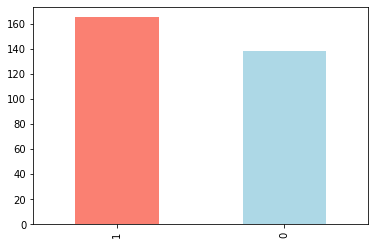

In [7]:
df["target"].value_counts().plot(kind='bar', color=["salmon", "lightblue"]);

In [8]:
df.info() # To get more info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Are there any missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart Disease Frequency according to Sex

In [11]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
# So we almost have 100 0's (females) and 200 1's (males)

In [13]:
# Let'stry to check if there is any correlation between sex and heart disease by doing crosstab
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [14]:
# Based on our data :
# Out of 96 women 72 women have heart disease which is approx 75% of the total amount
# Outof 207 men 93 men have heart disease which is approx 50% of the total amount
# On an average (75+50)/2 ~ 62% individuals tend to have a heart disease

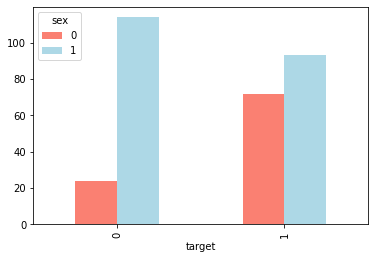

In [15]:
# Let's try to visualise this
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   color=["salmon", "lightblue"]);

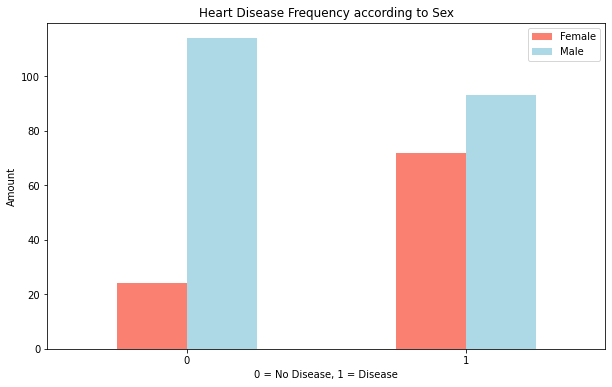

In [16]:
# Beautify the plot

pd.crosstab(df.target, df.sex).plot(kind="bar",
                                   figsize = (10,6),
                                   color=["salmon", "lightblue"]);
plt.title("Heart Disease Frequency according to Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0); # So that the 0 and 1 valesin X axis are not rotated

In [17]:
# From the above visualization it is easily observed that Females are proned to having a heart disease
# The ratio of females with heart disease to women without heart disease kind of shows that

## Age vs . Max Heart Rate for Heart Disease

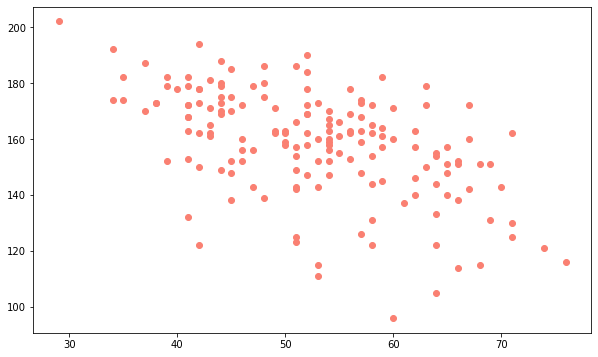

In [18]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter plot with positive examples (i.e. patient with heart disease)
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

In [19]:
# We can see some decline of max heart rate with the age

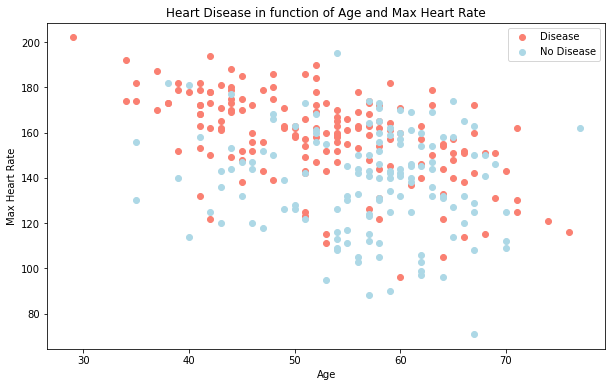

In [20]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter plot with positive examples (i.e. patient with heart disease)
plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           c="salmon");

# Scatter plot with negative examples (i.e. patient with no heart disease)
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           c="lightblue");

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [21]:
# It is a difflicult to find patterns in this. That's what our machine learning algorithms will do best.

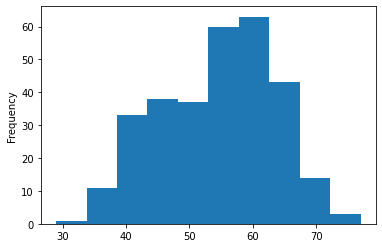

In [22]:
df.age.plot(kind="hist");

## Heart Disease Frequency per Chest Pain Type 

cp. Type of chest pain.
* 0 = typical angina - chest pain related to decrease blood supply to the heart
* 1 = atypical angina - chest pain not related to heart
* 2 = non — anginal pain - typically esophageal spasms (non heart related)
* 3 = asymptotic - chest pain not showing signs of disease

In [23]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [24]:
# The chest pains definitely indicate that there could be some underlying heart disease
# If we check for 2 (non-anginal pain) it is not heart related still the volumeof peoplehaving heart disease is pretty high
# Analyzing our data is helping us identify these kind of things

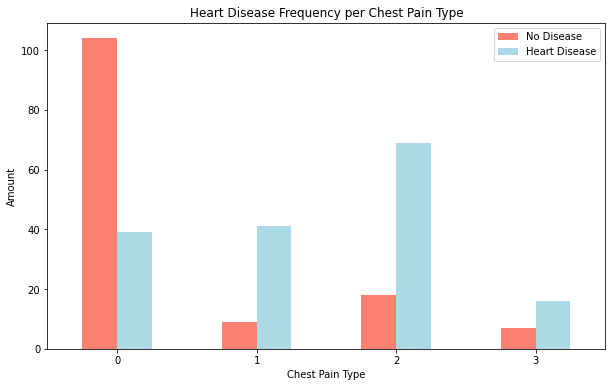

In [25]:
# Let's represent it better
pd.crosstab(df.cp, df.target).plot(kind = "bar",
                                  figsize = (10,6),
                                  color = ("salmon", "lightblue"))

# Let's beautify it
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Heart Disease"])
plt.xticks(rotation=0);

In [26]:
# We will create a correlation matrix

In [27]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


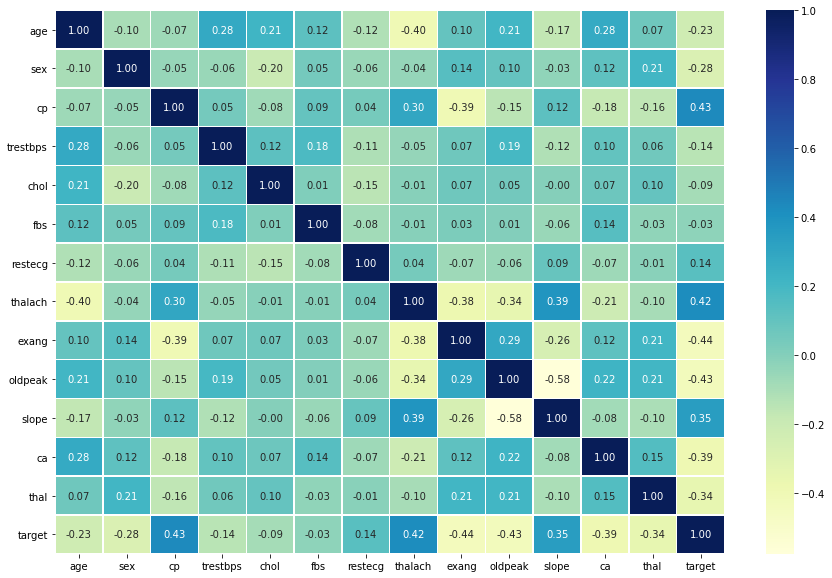

In [28]:
# We will visualize these values using a heatmap
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(linewidths = 0.5,
                 data = df.corr(),
                 annot = True,
                 fmt = ".2f",
                 cmap = "YlGnBu");

In [29]:
# We will now compare the values of all the independent variables with target column
# There is a positive correlation between cp (chest pain) and target (heart disease)
# There seems to be a negative correlation between exang (exercise induced chest pain) and target (heart disease)
# There is pretty much no correlation between fbs (Fasting Blood Sugar above 120 mg/dl) and target (heart disease)

## 5. Modelling

In [30]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
# Split data into X and y
X = df.drop(["target"], axis=1)
y = df["target"]

In [32]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [33]:
y, len(y)

(0      1
 1      1
 2      1
 3      1
 4      1
       ..
 298    0
 299    0
 300    0
 301    0
 302    0
 Name: target, Length: 303, dtype: int64,
 303)

In [34]:
np.random.seed(42)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

In [35]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [36]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

Classification Models which we are going to use:

1. Logistic Regression
2. K-Nearest Neighbor
3. Random Forest Classifier

In [37]:
# Put models in dictionary
models = {"Logistic Regression" : LogisticRegression(),
          "K-Nearest Neighbors" : KNeighborsClassifier(),
          "Random Forest Classifier" : RandomForestClassifier()}

# We will now create a function to fit and score the models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    models : The dictionary of the machine learning models which we want to fit and score.
    X_train : Training data without labels.
    X_test : Test data without labels.
    y_train : Training labels.
    y_test : Test labels.
    """
    # Create a dictionary to store model and its score
    model_score = {}
    for name, model in models.items():
        # for key, values in dictionary:
        model.fit(X_train, y_train)
        model_score[name] = model.score(X_test, y_test)
#         print(model_score)
    return model_score

In [38]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\Public\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'K-Nearest Neighbors': 0.6885245901639344,
 'Random Forest Classifier': 0.8524590163934426}

## Model Comparison

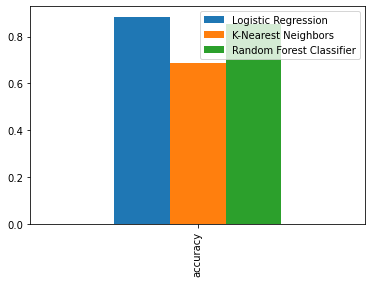

In [39]:
model_comparison = pd.DataFrame(model_scores, index=["accuracy"]) # Need to add index or else we will get Value Error
model_comparison.plot.bar();

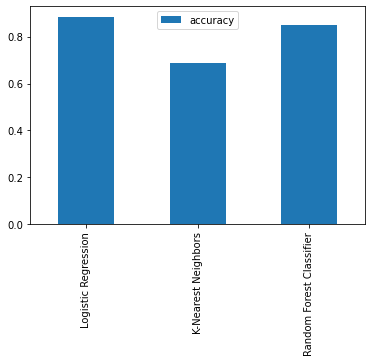

In [40]:
# Need to beautify the plot
model_comparison.T.plot.bar();

We have our baseline model ready now... and we know a model's first predictions aren't always what we should based our next steps off.
What should we do?

Let's look at following:

* Hyperparameters tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* AUC (Area under the curve)

### Hyperparameter Tuning

In [51]:
# Let's tune KNN

train_scores = []
test_scores = []

neighbors = range(1, 21)

# Create a list of different values for n_neighbors hyperparameter
for i in neighbors:
    
    knn = KNeighborsClassifier()
    
    # Hyperparameter setting
    knn.set_params(n_neighbors=i)
    
    # Fit the model
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [52]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [53]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum model test score is 75.41%


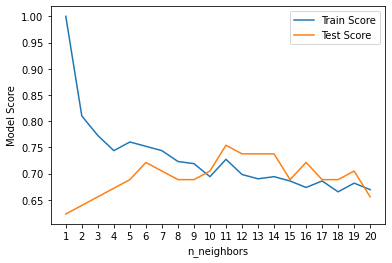

In [60]:
plt.plot(neighbors, train_scores, label = "Train Score")
plt.plot(neighbors,test_scores, label = "Test Score")
plt.xlabel("n_neighbors")
plt.ylabel("Model Score")
plt.xticks(np.arange(1, 21, 1))
plt.legend(["Train Score", "Test Score"]);

# The maximum model score
print(f"Maximum model test score is {max(test_scores)*100:.2f}%");

### Hyperparameter tuning with RandomizedSearchCV

We're going to tune:

* Logistic Regression
* Random Forest Classifier

... using RandomizedSearchCV

In [73]:
# Create a hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for Randomized Forest Classifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

We have already scored the models on our train and test split. We will now try to apply cross validation score along with tuning hyperparameters using RandomizedSearchCV.

In [69]:
# Tune Logistic Regression
np.random.seed(42)

# Setup random hyperparameter search for Logistic Regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                               param_distributions = log_reg_grid,
                               cv=5,
                               n_iter=20,
                               verbose=True)

# Fit random search hyperparameter seaerch model for Logistic Regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [70]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [71]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), let's do the same for RandomForestClassifier()...

In [76]:
# Setup the random seed
np.random.seed(42)

# Fit the model
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions = rf_grid,
                          n_iter = 20,
                          cv = 5,
                          verbose = True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [75]:
# Finding the best parameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [77]:
# Evaluate the model
rs_rf.score(X_test, y_test)

0.8688524590163934

In [78]:
# Even after tuning the hyperparameters of Random Forest Classifier it is not scoring as good as Logistic Regression
# So, we will now exhaustively tune hyperparameters using GridSearchCV to try improve the model

## Hyperparameter Tuning using GridSearchCV

In [79]:
# Different hyperparameters for our Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Setup the random seed
np.random.seed(42)

# Fit the model using GridSearchCV
gs_log_reg = GridSearchCV(LogisticRegression(),
                         param_grid = log_reg_grid,
                         cv=5,
                         verbose=True)
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [81]:
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [82]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

### Evaluating our tuned Machine Learning Classifier, beyond accuracy

* ROC curve and AUC score
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F-1 score

... and it would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [84]:
# Making predictions with our tuned model
y_preds = gs_log_reg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [85]:
# True values
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

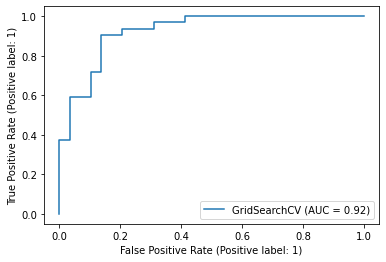

In [87]:
# Plot ROC curve and calculate AUC metric

plot_roc_curve(gs_log_reg,
              X_test,
              y_test);

In [89]:
# Confusion Matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


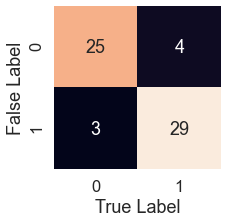

In [96]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    ax.set(xlabel="True Label")
    ax.set(ylabel="False Label")
    
plot_conf_mat(y_test, y_preds)

Now we've got a ROC curve, an AUC metric and a confusion matrix, let's get a classification report, as well as cross-validated precision, recall and f1-score.

In [98]:
print(classification_report(y_test, y_preds));

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evualtion metrics using cross-validation

We're going to calculate accuracy, precision, recall, f-1 score of our model using cross-validation and to do so we'll be using `cross_val_score()`.

In [99]:
# Check best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [101]:
# Create new classifier with best parameters
clf = LogisticRegression(C= 0.23357214690901212,
                        solver= "liblinear")

In [102]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [105]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [110]:
# Cross-validated precision

cv_precision = cross_val_score(clf,
                              X,
                              y,
                              cv=5,
                              scoring='precision')
cv_precision

array([0.775     , 0.88571429, 0.86111111, 0.86111111, 0.725     ])

In [111]:
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [112]:
# Cross-validated recall

cv_recall = cross_val_score(clf,
                           X,
                           y,
                           cv=5,
                           scoring='recall')
cv_recall

array([0.93939394, 0.93939394, 0.93939394, 0.93939394, 0.87878788])

In [113]:
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [114]:
# Cross-validated f-1 score

cv_f1 = cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring='f1')
cv_f1

array([0.84931507, 0.91176471, 0.89855072, 0.89855072, 0.79452055])

In [117]:
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

<AxesSubplot:title={'center':'Cross-validated classification metrics'}>

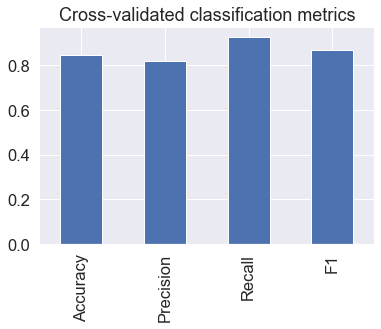

In [118]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy" : cv_acc,
                          "Precision" : cv_precision,
                          "Recall" : cv_recall,
                          "F1" : cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                     legend=False)

### Feature Importance

Feature Importance is another way of asking,"which features contributed the most to the outcomes of the model and how didthey contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our Logistic Regression Model...

In [119]:
# Check best parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [121]:
# Fit an instance of Logistic Regression
clf = LogisticRegression(C=0.23357214690901212,
                        solver='liblinear')

clf.fit(X_train, y_train);

In [122]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [124]:
# Check coef_ which would help us understand how the featrures are correlated to the target
clf.coef_

array([[ 0.00369922, -0.90424089,  0.67472826, -0.0116134 , -0.00170364,
         0.04787688,  0.33490195,  0.02472938, -0.63120405, -0.57590942,
         0.47095136, -0.65165348, -0.69984206]])

In [125]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.003699220351664148,
 'sex': -0.9042408930260735,
 'cp': 0.6747282624694215,
 'trestbps': -0.011613401789010375,
 'chol': -0.0017036441780094993,
 'fbs': 0.047876883382302414,
 'restecg': 0.3349019539205334,
 'thalach': 0.024729383396378347,
 'exang': -0.6312040510578483,
 'oldpeak': -0.5759094230155162,
 'slope': 0.47095135616471195,
 'ca': -0.6516534832909596,
 'thal': -0.6998420628111434}

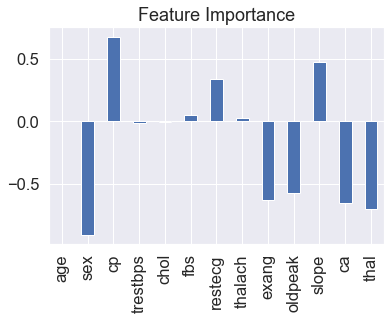

In [128]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [129]:
# Now these values are pretty similar to the correlation matrix we had plotted earlier. The heatmap.

In [130]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [133]:
# The ratio of sex to target decreases, that's why the negative correlation

In [134]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


11. slope. Peak exercise ST segment
  * 0 = upsloping - better heart rate with exercise (uncommon)
  * 1 = flat - minimal change (typical healthy heart)
  * 2 = downsloping - signs of unhealthy heart

In [132]:
# This makes sense as the more the slope is (i.e. 2) the heart disease is found more on them

## 6. Experimentation

If you haven't hit your evaluation metric... then ask yourself...

* Could you collect more data?
* Could you try better model? Like CatBoost or XGBoost?
* Could you improve current models? (beyond what we've done so far)
* If your model is good enough (you have hit your evaluation metric) how would you export it and share it with others?